# Advanced Python: Principal Component Analysis (PCA)

<center>
<img src="../pictures/escher_pattern.avif" style="width:676px;height:392px;">
<br>
<i>Day and Night (1938, M.C. Escher)</i>
</center>

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction and data visualization and usually a good first step in data analysis in neuroscience, psychology and beyond. In this week's sessions, we will explore PCA with 2 sklearn built-in datasets.

A secondary theme is to practice showing and manipulating *images* in Python. We will start with handwritten digits and progress to work with images of faces.

References:
1. [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

## PCA with digits dataset

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# load dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

### Warm-up exercises:
1. `digits_data` contains all the samples of handwritten digits and is of shape (n_samples, n_features); `digits_target` contains the corresponding labels.
   1. What is the shape of `digits_data` and `digits_target`?
   2. How many *unique* labels are there in `digits_target`?
2. Turns out, each sample in `digits_data` is a (square) image.
   1. Use `plt.imshow` to visualize first 4 samples.
   > *Hint:* You should use `reshape` to convert the 1D array into a 2D array.
3. (Grayscale) Images and 2D arrays of pixel values are just 2 sides of the same coin. (Feel free to print out the values for some example images.) How can you flip the image horizontally or vertically using slicing? On your own, add and subtract images together to create new images. What effects do you see?

In [14]:
n_samples, n_features = digits_data.shape
print("Number of samples:", n_samples)
print("Number of features:", n_features)

n_classes = len(np.unique(digits_target))
print("Number of unique labels:", n_classes)

Number of samples: 1797
Number of features: 64
Number of unique labels: 10


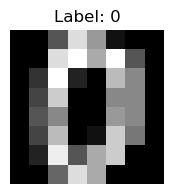

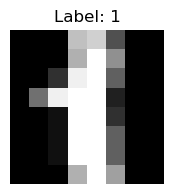

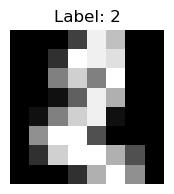

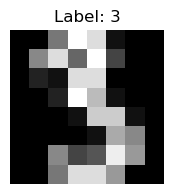

In [ ]:
for i in range(4):
    plt.figure(figsize=(2, 2))
    plt.imshow(digits_data[i].reshape(8, 8), cmap='gray')
    plt.title(f"Label: {digits_target[i]}")
    plt.axis('off')
    plt.show()

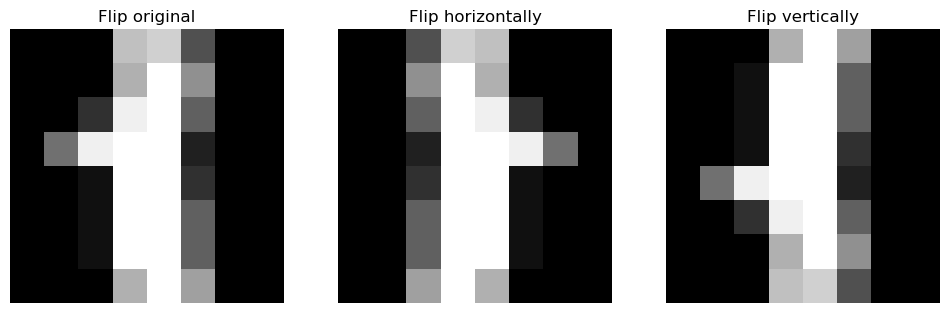

In [22]:
ex_digit = digits_data[1].reshape(8,8)

# flip ex_digit horizontally
ex_digit_horizontally = ex_digit[:, ::-1]

# flip ex_digit vertically
ex_digit_vertically = ex_digit[::-1, :]

plt.subplots(1, 3, figsize=(12, 4))
for i, img in enumerate([ex_digit, ex_digit_horizontally, ex_digit_vertically]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Flip {'horizontally' if i == 1 else 'vertically' if i == 2 else 'original'}")
plt.show()

### Preprocess the data
Prior to applying PCA, we will standardize the data by scaling each feature to unit variance and zero 0 (typically `sklearn.PCA` deals with demeaning internally, but it does not scale the data to unit variance).

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
digits_data_scaled = scaler.fit_transform(digits_data)

### Run PCA
We can use a built-in PCA implementation from `sklearn.decomposition`. Similarly to linear regression, we need to first create a PCA object.

In [98]:
from sklearn.decomposition import PCA

pca = PCA() # optionally, you can specify the number of components
# fit model to our data and transform it
digits_pca = pca.fit_transform(digits_data_scaled)

### Exercises
1. Go to the documentation of `sklearn.decomposition.PCA` and find out what the *attributes* are for the PCA object.
2. Plot *cumulative* explained variance ratio for our PCA object. What trend do you expect to see (if any)? How many components do you need to capture 60% of the variance? How many for 80%? How many for 90%?
3. How much variance is explained by the first 2 components? How about the first 3 components?

The first 11 PCs are needed to capture 60% of the variance.
The first 21 PCs are needed to capture 80% of the variance.
The first 31 PCs are needed to capture 90% of the variance.


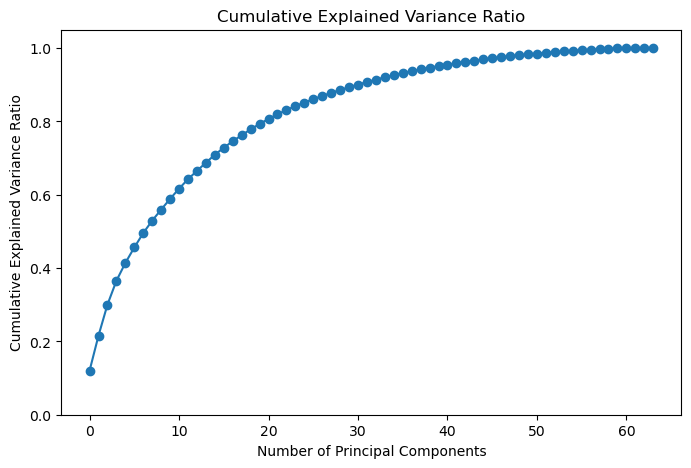

In [99]:
cum_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.ylim(0, 1.05)
plt.plot(cum_explained_var_ratio, marker='o')
plt.title("Cumulative Explained Variance Ratio")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")

n60 = np.where(cum_explained_var_ratio >= 0.6)[0][0]
print(f"The first {n60+1} PCs are needed to capture 60% of the variance.")

n80 = np.where(cum_explained_var_ratio >= 0.8)[0][0]
print(f"The first {n80+1} PCs are needed to capture 80% of the variance.")

n90 = np.where(cum_explained_var_ratio >= 0.9)[0][0]
print(f"The first {n90+1} PCs are needed to capture 90% of the variance.")

### Exercises
1. Check the components of PCA object. What are they?
   > *Hint:* You can use `pca.components_` to get the components.
2. Visualize the first 12 components as images.
3. Check sample 0's PCA projection. What are the most important components for this sample?
4. Visualize sample 0 now compressed into the first 12 components. How does it look like? How does it compare to the original image? 

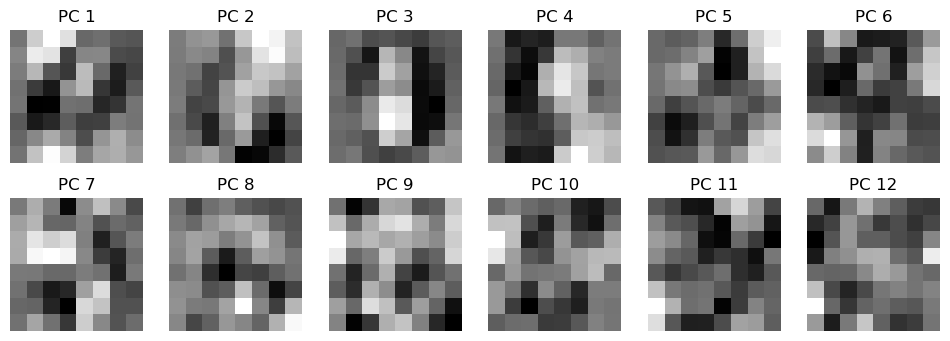

In [100]:
# visualize the first 10 components
pcs = pca.components_
plt.subplots(2, 6, figsize=(12, 4))

for i in range(12):
    plt.subplot(2, 6, i + 1)
    plt.imshow(pcs[i].reshape(8, 8), cmap='gray')
    plt.title(f"PC {i + 1}")
    plt.axis('off')

Text(0, 0.5, 'Projection Value')

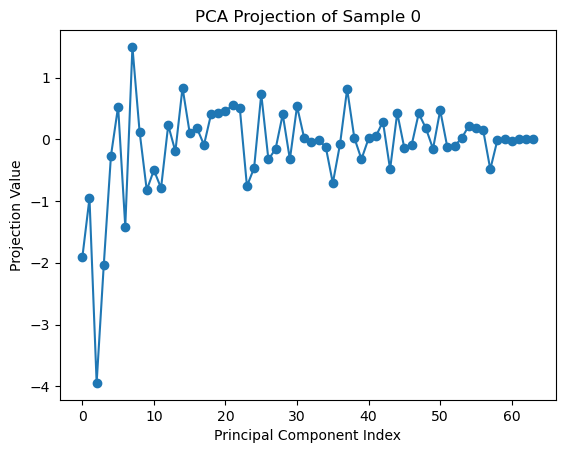

In [101]:
# 0th sample's PCA projection
i = 0
pca_proj = digits_pca[i]

plt.plot(pca_proj, "o-")
plt.title(f"PCA Projection of Sample {i}")
plt.xlabel("Principal Component Index")
plt.ylabel("Projection Value")

(np.float64(-0.5), np.float64(7.5), np.float64(7.5), np.float64(-0.5))

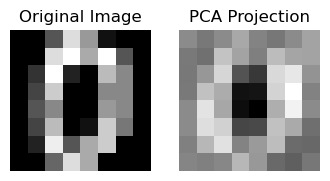

In [109]:
# sample 0 projected onto the first n_pcs components
# from copy import deepcopy
# proj_img = deepcopy(pca.mean_).reshape(8, 8) 
proj_img = np.zeros((8, 8))  # initialize projection image

n_pcs = 12
for i in range(n_pcs):
    proj_img += pca_proj[i] * pca.components_[i].reshape(8, 8)

plt.subplots(1, 2, figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(proj_img, cmap='gray')
plt.title("PCA Projection")

plt.axis('off')

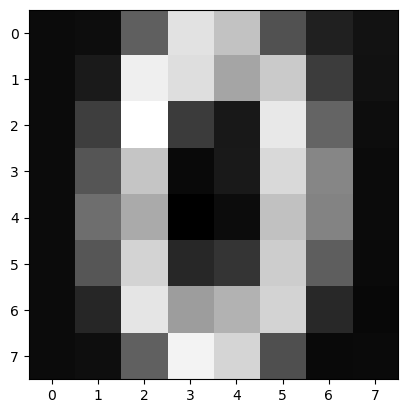

In [110]:
# because we scaled and demeaned the data, we need to inverse transform the projected image to take it back to the original scale.
plt.imshow(scaler.inverse_transform(proj_img.reshape(1, -1)).reshape(8, 8), cmap='gray')